In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
df = pd.read_csv('/kaggle/input/chess/games.csv')
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [4]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [5]:
x = df.drop(columns=['opening_eco','id'])
print(x)

       rated    created_at  last_move_at  turns victory_status winner  \
0      False  1.504210e+12  1.504210e+12     13      outoftime  white   
1       True  1.504130e+12  1.504130e+12     16         resign  black   
2       True  1.504130e+12  1.504130e+12     61           mate  white   
3       True  1.504110e+12  1.504110e+12     61           mate  white   
4       True  1.504030e+12  1.504030e+12     95           mate  white   
...      ...           ...           ...    ...            ...    ...   
20053   True  1.499791e+12  1.499791e+12     24         resign  white   
20054   True  1.499698e+12  1.499699e+12     82           mate  black   
20055   True  1.499698e+12  1.499698e+12     35           mate  white   
20056   True  1.499696e+12  1.499697e+12    109         resign  white   
20057   True  1.499643e+12  1.499644e+12     78           mate  black   

      increment_code       white_id  white_rating            black_id  \
0               15+2       bourgris          1500 

In [6]:
y = df['opening_eco']
print(y)

0        D10
1        B00
2        C20
3        D02
4        C41
        ... 
20053    A80
20054    A41
20055    D00
20056    B07
20057    D00
Name: opening_eco, Length: 20058, dtype: object


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

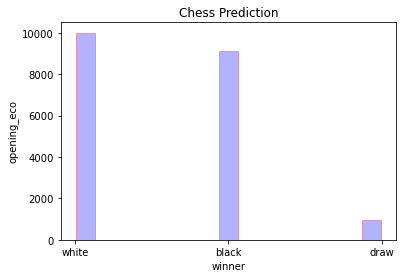

In [8]:
#plotting histogram 
plt.hist(df['winner'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('winner') 
plt.ylabel('opening_eco') 

#plot title 
plt.title('Chess Prediction') 
plt.show();

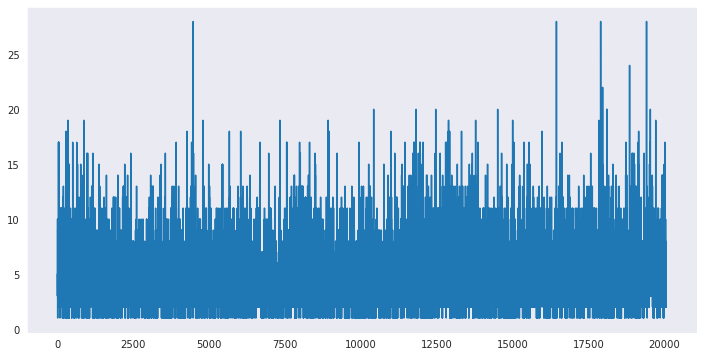

In [9]:
z = x['opening_ply']
# Change the style of the figure to the "dark" theme
sns.set_style("dark")
# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=z)

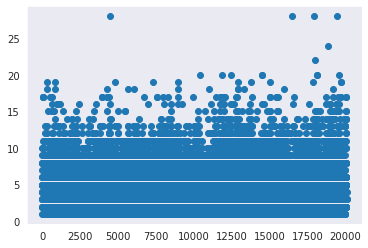

In [10]:
plt.scatter(df.index,df['opening_ply'])
plt.show()

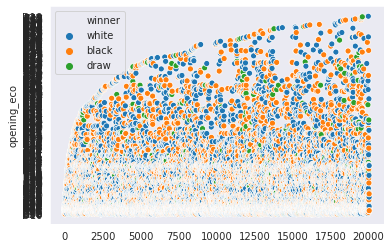

In [11]:
sns.scatterplot(x=df.index,y=df['opening_eco'],hue=df['winner'])

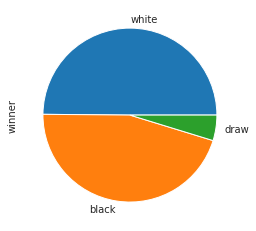

In [12]:
df['winner'].value_counts().head(10).plot.pie()
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa86017f750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa86017ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8601c4110>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa860189cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa860189e50>],
 'means': []}

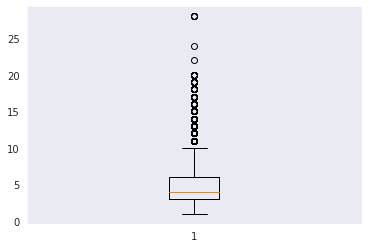

In [13]:
plt.boxplot(df['opening_ply'])

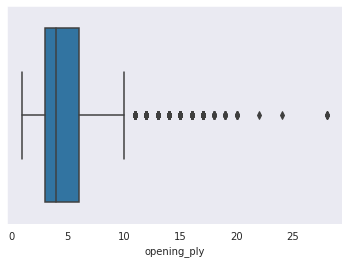

In [14]:
sns.boxplot(df['opening_ply'])

In [15]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
x= x.apply(label_encoder.fit_transform)
print(x)


       rated  created_at  last_move_at  turns  victory_status  winner  \
0          0       11904         11907     12               2       2   
1          1       11628         11635     15               3       0   
2          1       11628         11635     60               1       2   
3          1       11541         11550     60               1       2   
4          1       11317         11325     94               1       2   
...      ...         ...           ...    ...             ...     ...   
20053      1        7739          7733     23               3       2   
20054      1        7707          7701     81               1       0   
20055      1        7706          7700     34               1       2   
20056      1        7705          7699    108               3       2   
20057      1        7701          7694     77               1       0   

       increment_code  white_id  white_rating  black_id  black_rating  moves  \
0                 110      1287           6

In [16]:
y= label_encoder.fit_transform(y)
print(y)

[248  71 171 ... 239  78 239]


In [17]:
#Normalisation
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(x)
normalized_X

array([[0.00000000e+00, 6.78269625e-01, 6.78440560e-01, ...,
        2.57769807e-01, 7.90288954e-02, 2.27913181e-04],
       [5.45904333e-05, 6.34777559e-01, 6.35159692e-01, ...,
        1.08471191e-01, 4.09428250e-02, 1.63771300e-04],
       [4.24520598e-05, 4.93632552e-01, 4.93929716e-01, ...,
        6.95492096e-01, 2.75938389e-02, 8.49041197e-05],
       ...,
       [7.02262803e-05, 5.41163716e-01, 5.40742359e-01, ...,
        2.40946368e-01, 6.86110759e-02, 1.40452561e-04],
       [5.87979373e-05, 4.53038107e-01, 4.52685320e-01, ...,
        6.59536463e-01, 4.73911375e-02, 1.76393812e-04],
       [8.02570002e-05, 6.18059158e-01, 6.17497359e-01, ...,
        2.71669946e-01, 7.84110892e-02, 1.60514000e-04]])

In [18]:
#Standardisation
# standardize the data attributes
standardized_X = preprocessing.scale(x)
standardized_X

array([[-2.03448366,  1.42704987,  1.42577445, ..., -0.90516282,
         1.49500186,  0.06603886],
       [ 0.49152521,  1.35210443,  1.35201795, ..., -1.37014681,
        -0.05565041, -0.29254464],
       [ 0.49152521,  1.35210443,  1.35201795, ...,  1.26836699,
        -0.29908091, -0.65112813],
       ...,
       [ 0.49152521,  0.28711887,  0.28498927, ..., -1.10548899,
         0.49693682, -0.65112813],
       [ 0.49152521,  0.28684733,  0.28471811, ...,  0.32153715,
         0.08067067, -0.29254464],
       [ 0.49152521,  0.28576116,  0.28336229, ..., -1.11391992,
         0.49693682, -0.65112813]])

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [21]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing dataabs
X_test_norm = norm.transform(x_test)

In [22]:

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

# transform testing dataabs
X_test_norm = norm.transform(x_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)

Scaled Train Data: 


[[0.         0.33064639 0.32901024 ... 0.89565493 0.37940379 0.18181818]
 [1.         0.74806084 0.74615093 ... 0.37382387 0.95121951 0.04545455]
 [1.         0.72722433 0.72529389 ... 0.4199704  0.89701897 0.13636364]
 ...
 [1.         0.45368821 0.45225635 ... 0.08150967 0.17682927 0.13636364]
 [1.         0.31041825 0.30906333 ... 0.06882334 0.18902439 0.09090909]
 [1.         0.94874525 0.94781949 ... 0.52378687 0.07520325 0.04545455]]


Scaled Test Data: 


[[1.         0.16828897 0.1677664  ... 0.66724812 0.7303523  0.36363636]
 [1.         0.17680608 0.17633675 ... 0.22232794 0.79878049 0.45454545]
 [1.         0.41665399 0.41532044 ... 0.31509673 0.24322493 0.09090909]
 ...
 [1.         0.36076046 0.35972696 ... 0.31832118 0.29336043 0.04545455]
 [1.         0.03353612 0.0334471  ... 0.5577228  0.77439024 0.13636364]
 [1.         0.70365019 0.70178233 ... 0.86060894 0.4403794  0.09090909]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.8339980059820539


In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)


print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9439182452642074
